In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from utils.hts_eda_utils import get_zero_columns, remove_zero_columns
from utils import hts_eda_utils

In [2]:
original_df = pd.read_excel('data/Quarterly_smoothing.xlsx', index_col=0)
original_df.head()

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,...,Южный ФО - VELBINE - Velbine solution for inf 10 mg/ml 5ml #1,Южный ФО - VESTIBO - Vestibo tabs 16 mg #30,Южный ФО - VESTIBO - Vestibo tabs 24 mg #30,Южный ФО - VINCRISTINE-TEVA - Vincristine-Teva lyoph for inf 1 mg/ml 1 ml #1,Южный ФО - VINCRISTINE-TEVA - Vincristine-Teva lyoph for inf 1 mg/ml 2 ml #1,Южный ФО - VINORELBINE-TEVA - VINORELBIN-TEVA 50 mg.5 ml,Южный ФО - VINORELBINE-TEVA - VINORELBINE-TEVA concentrate 10 mg.ml 1 ml,Южный ФО - ZINCTERAL - Zincteral-Teva FC tabs 124 mg #150,Южный ФО - ZINCTERAL - Zincteral-Teva FC tabs 124 mg #25,Южный ФО - ZOLEDRONAT-TEVA - Zoledronate-Teva concentrate for inf 4 mg/5ml 5 ml #1
Month,,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,0,948,35,87,...,105,0,314,400,0,0,0,0,16,9689
2018-04-01,1000,0,0,9,0,0,0,1036,35,87,...,1045,0,247,2160,0,0,0,0,0,11704
2018-05-01,1731,0,0,301,0,0,0,1245,93,147,...,1010,0,247,3245,0,0,0,0,0,15232
2018-06-01,2090,0,0,490,0,0,0,1786,183,103,...,946,0,0,3235,0,0,0,0,0,6585
2018-07-01,1547,0,60,490,0,0,0,4131,183,103,...,45,0,0,5085,0,0,0,6,0,6034


In [3]:
pill_names = [item.split(' - ')[2] for item in original_df.columns]
pill_names[:5]

['Adrianol for adults nasal drops 10 ml #1',
 'Agalates tabs 0.5 mg #2',
 'Agalates tabs 0.5 mg #8',
 'Almagel A susp 170 ml #1',
 'Almagel Neo sachet 10 ml #10']

In [4]:
pill_names = [p.split(' #')[0] for p in pill_names]
pill_names[:5]

['Adrianol for adults nasal drops 10 ml',
 'Agalates tabs 0.5 mg',
 'Agalates tabs 0.5 mg',
 'Almagel A susp 170 ml',
 'Almagel Neo sachet 10 ml']

In [5]:
len(pill_names)

2254

In [6]:
unique_pill_names = list(set(pill_names))

In [7]:
len(unique_pill_names)

248

In [8]:
unique_pill_names

['Kalymin 60 N tabs 60 mg 100',
 'DuoResp Spiromax pwd for inh 320/9 mcg 60 doses',
 'Gastal tabs',
 'Lestrodex FC tabs 2.5 mg',
 'Anastrozole-Teva FC tabs 1 mg',
 'Valz Combi FC tabs 5 mg + 80 mg',
 'Valz Combi FC tabs 10 mg + 160 mg',
 'Eplenor-Teva tabs 50 mg',
 'Dolobene gel 45 g',
 'Corinfar ER FC tabs 10 mg',
 'Finlepsin retard ER tabs 200 mg',
 'Sumamed caps 250 mg',
 'Adrianol for adults nasal drops 10 ml',
 'Diclofenac-Teva gel 1 % 100 g',
 'Beclazone Eco aerosol for inh 100 mcg 200 doses',
 'Vestibo tabs 16 mg',
 'Meloxicam-Teva tabs 7.5 mg',
 'Amlodipine-Teva tabs 10 mg',
 'Atorvastatin-Teva FC tabs 20 mg',
 'Etoricoxib FC tabs 90 mg',
 'Cordinorm Cor tabs 2.5 mg',
 'Methotrexate-Teva solution vial 25 mg/ml 2 ml',
 'Agalates tabs 0.5 mg',
 'Fludarabine-Teva concentrate for sol 25 mg/ml 2ml',
 'Atorvastatin-Teva FC tabs 10 mg',
 'Perindopril-Teva FC tabs 10 mg',
 'Levofloxacin-Teva FC tabs 500 mg',
 'Rhinonorm-Teva nasal spray for adults 0.1% 20 ml',
 'Valz FC tabs 80 mg',
 '

### Get OpenAI Embeddings

In [9]:
import openai

with open('/Users/ariellubonja/prog/openai-api-key.txt', 'r') as file:
    # Read the entire file into a single string
    openai_key = file.read()

openai.api_key = openai_key

In [10]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

In [11]:
# embeddings = [get_embedding(pill_name) for pill_name in unique_pill_names]
df = pd.read_csv('outputs/pill_name_embeddings.csv', index_col=0, header=None)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536
0,,,,,,,,,,,,,,,,,,,,,
Equoral solution 100 mg/ml 50 ml,-0.000495,-0.008781,-0.020337,-0.015791,-0.008583,-0.001838,-0.013770,-0.019346,-0.015712,-0.005064,...,-0.016161,-0.001610,0.060893,-0.010387,-0.010902,-0.024037,-0.019650,-0.020932,-0.007261,-0.017338
Corinfar retard ER FC tabs 20 mg,0.009683,-0.000972,0.013415,-0.019861,-0.002309,-0.000472,-0.038923,-0.023621,-0.003052,-0.010006,...,0.011769,-0.007672,0.053826,-0.027464,-0.001061,-0.000743,-0.019709,0.002508,-0.015068,-0.024420
Finlepsin tabs 200 mg,0.020015,0.000540,0.000571,-0.021259,-0.034976,0.018434,-0.036192,-0.007156,-0.001477,0.005254,...,0.001450,-0.012069,0.046869,-0.020704,0.019488,-0.005673,0.006139,-0.025043,-0.001125,-0.031624
Levodopa/Benserazide-Teva tabs 100/25 mg,0.016761,-0.005747,0.027491,-0.009636,-0.025135,0.033988,-0.028422,-0.024889,-0.012451,0.001261,...,-0.001061,-0.012697,0.045740,-0.017033,0.002226,0.004925,-0.016515,-0.018961,-0.010192,-0.031399
Almagel A susp 170 ml,0.013071,0.018278,0.006499,-0.026326,-0.017739,0.030928,-0.013308,-0.003590,0.001770,-0.024367,...,0.000654,0.001797,0.065539,-0.005727,0.015596,0.000688,-0.033558,-0.024156,-0.013419,0.001303


In [12]:
# df.to_csv('outputs/pill_name_embeddings.csv')
# df.to_csv('outputs/pill_name_embeddings.tsv', sep='\t', index=False, header=False)
# pd.DataFrame(unique_pill_names).to_csv('outputs/pill_names.tsv', index=False, header=False, sep='\t')

#### Cluster embeddings to see if similar drugs

In [13]:
drug_families = [u.split(' ')[0] for u in unique_pill_names] # Get only first part of name

drug_families = [d.split('-')[0] for d in drug_families]# Remove "-Teva"

drug_families#[:5]

['Kalymin',
 'DuoResp',
 'Gastal',
 'Lestrodex',
 'Anastrozole',
 'Valz',
 'Valz',
 'Eplenor',
 'Dolobene',
 'Corinfar',
 'Finlepsin',
 'Sumamed',
 'Adrianol',
 'Diclofenac',
 'Beclazone',
 'Vestibo',
 'Meloxicam',
 'Amlodipine',
 'Atorvastatin',
 'Etoricoxib',
 'Cordinorm',
 'Methotrexate',
 'Agalates',
 'Fludarabine',
 'Atorvastatin',
 'Perindopril',
 'Levofloxacin',
 'Rhinonorm',
 'Valz',
 'Equoral',
 'Convulsofin',
 'Copaxone',
 'Dolobene',
 'Cinqeiro',
 'Equoral',
 'CLOPIDOGREL',
 'Sumatriptan',
 'Ambrobene',
 'Valz',
 'Dutasteride',
 'Phezam',
 'Metoprolol',
 'Cerucal',
 'Copaxone',
 'Irinotecan',
 'Lisinopril',
 'Almagel',
 'Levodopa/Carbidopa/Entacapone',
 'Metformin',
 'Oxaliplatin',
 'Omeprazole',
 'Gemcitabin',
 'VINORELBIN',
 'Rosuvastatin',
 'Valz',
 'Cisplatin',
 'Stoptussin',
 'Omeprazole',
 'Topotecan',
 'Lisinoton',
 'Sumamed',
 'Ambrobene',
 'Dynamico',
 'Cuprenil',
 'Indapamide/Perindopril',
 'Salbutamol',
 'Diosmin/Hesperidine',
 'Dynamico',
 'Ambrobene',
 'Almont',

In [14]:
len(drug_families)

248

In [15]:
len(set(drug_families))

137

In [16]:
df['class'] = drug_families

### Visualizing Embeddings & Classes

https://projector.tensorflow.org

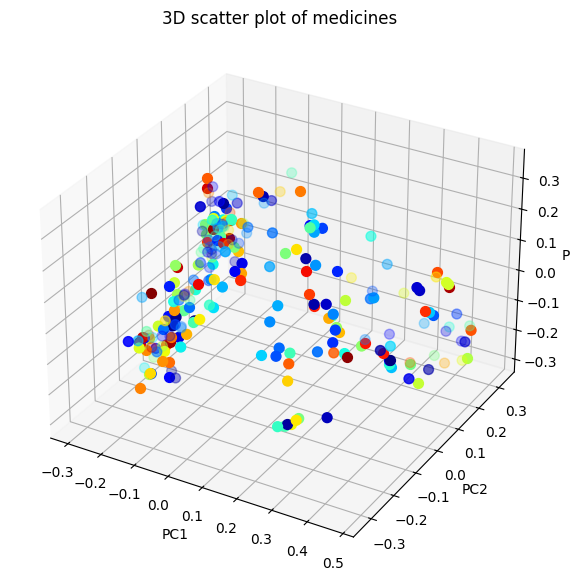

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Extract embeddings and perform PCA
embeddings = df.drop('class', axis=1).values
pca = PCA(n_components=3)
embeddings_pca = pca.fit_transform(embeddings)

# Step 2: Attach PCA results to the DataFrame
df[['x', 'y', 'z']] = pd.DataFrame(embeddings_pca, index=df.index)

# Step 3: Plot 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on unique classes
colors = plt.cm.jet(np.linspace(0, 1, len(df['class'].unique())))

for i, cl in enumerate(df['class'].unique()):
    subset = df[df['class'] == cl]
    ax.scatter(subset['x'], subset['y'], subset['z'], label=cl, c=[colors[i]]*len(subset), s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("3D scatter plot of medicines")
plt.show()

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# Extract embeddings and perform PCA
embeddings = df.drop('class', axis=1).values
pca = PCA(n_components=3)
embeddings_pca = pca.fit_transform(embeddings)

# Attach PCA results to the DataFrame
df[['x', 'y', 'z']] = pd.DataFrame(embeddings_pca, index=df.index)

# Create interactive 3D scatter plot using plotly
fig = px.scatter_3d(df, x='x', y='y', z='z', color='class', 
                    labels={'x':'PC1', 'y':'PC2', 'z':'PC3'}, 
                    title="3D scatter plot of medicines")
fig.show()
